In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/Complete_housing_set.csv')

y = df['price'].values
print(any(np.isinf(y))) #Making sure no super weird infinity values 
print(np.max(y))

False
7700000.0


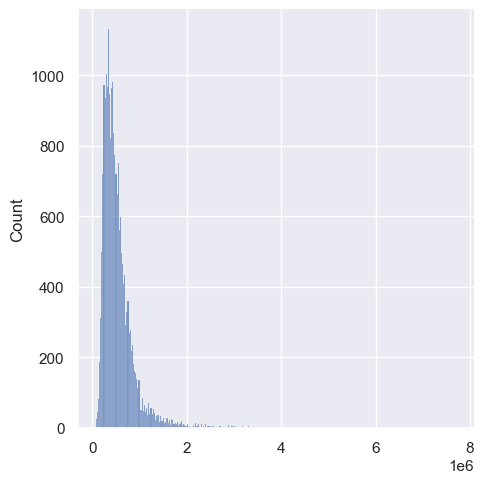

In [2]:
sns.set_theme()
sns.displot(data=y)

In [3]:
stdy = y[(y > y.mean()-3*y.std()) & (y < y.mean()+3*y.std())]
#y = y[(y['price']>lower_limit)&(y['price']<upper_limit)]
sns.displot(data=stdy)

In [4]:
print(len(y))
print(len(stdy))
print('Number of outliers: ' + str(len(y) - len(stdy)))

21613
21207
Number of outliers: 406


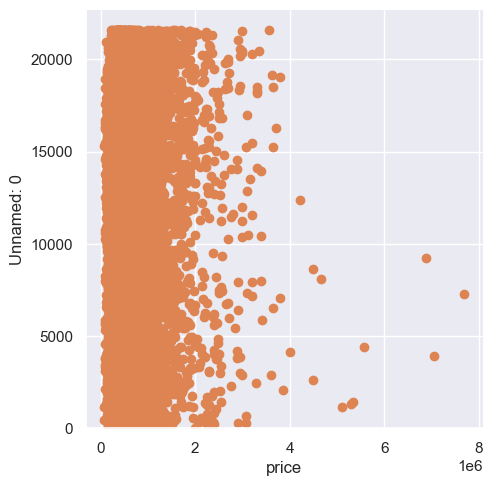

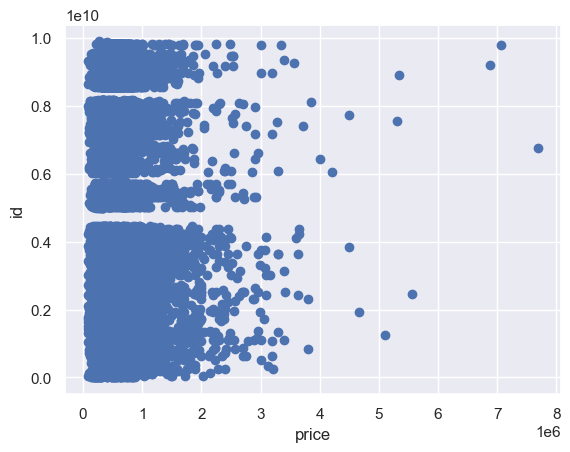

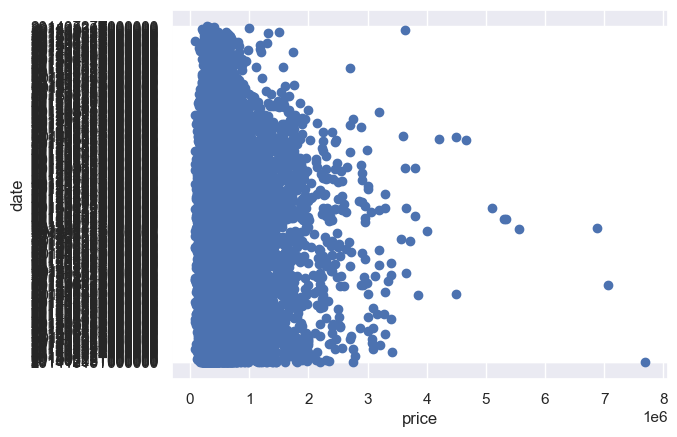

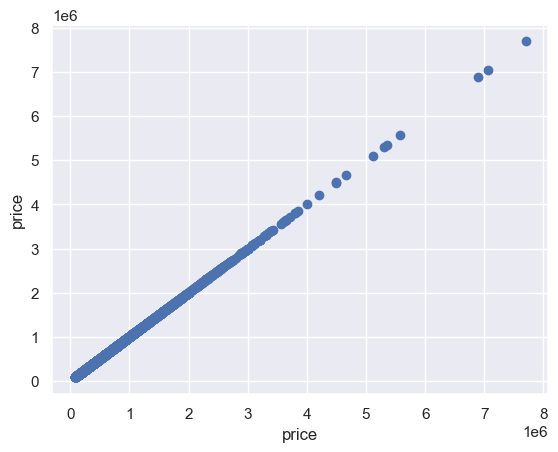

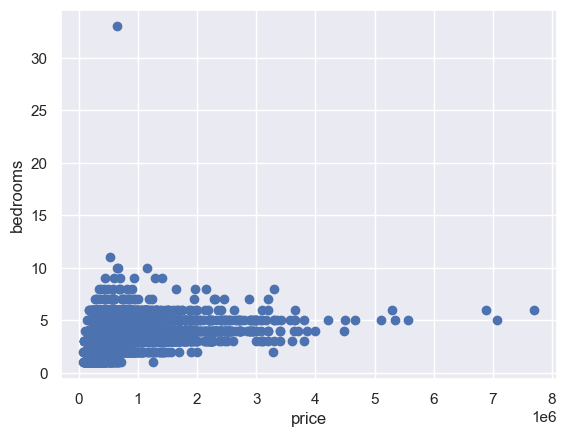

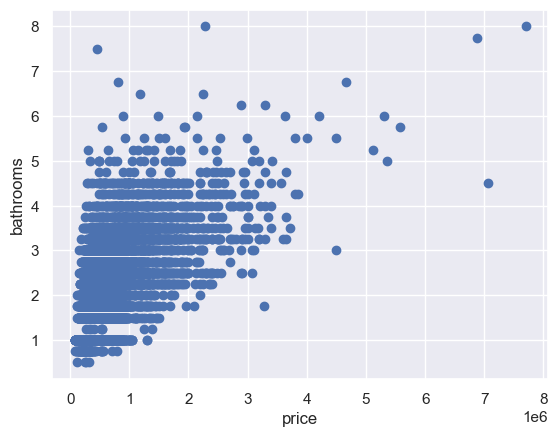

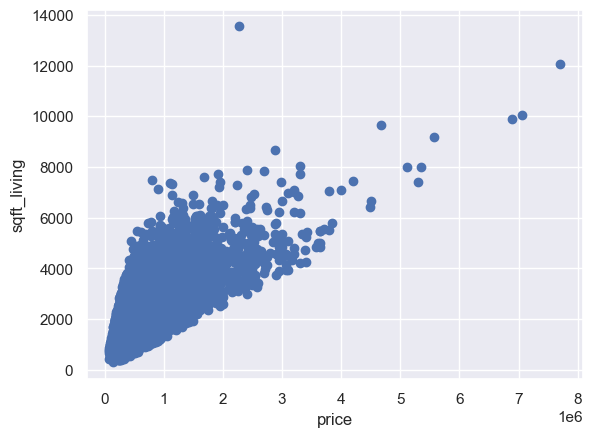

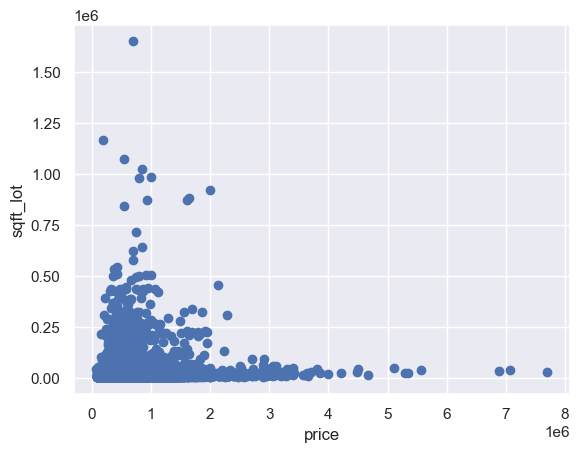

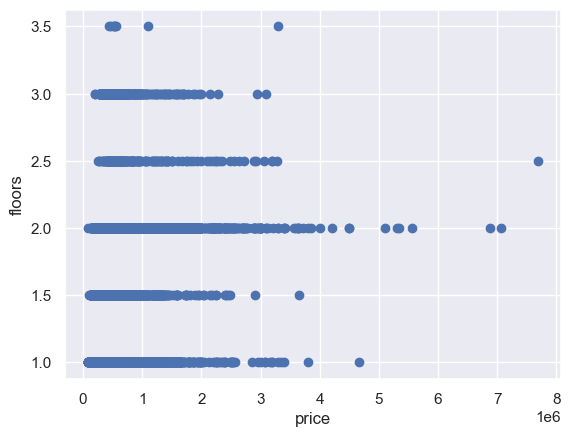

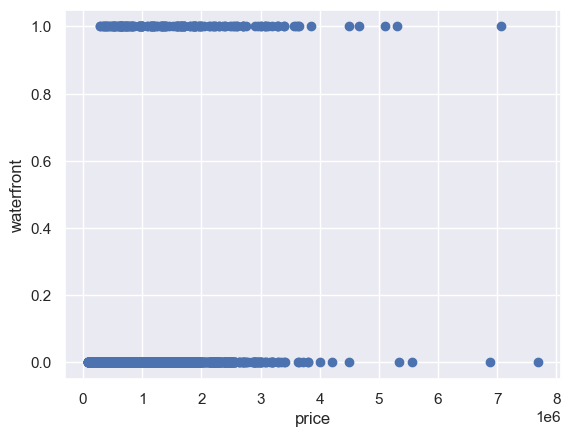

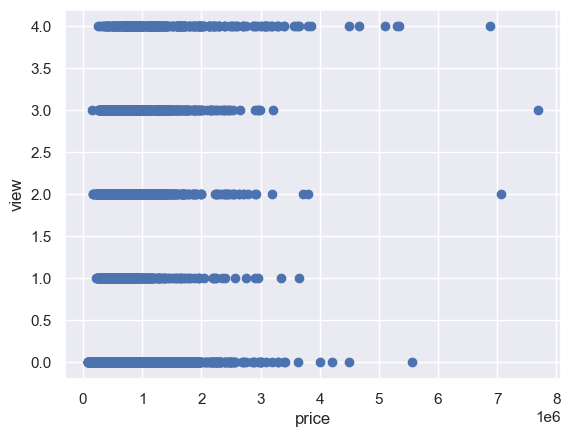

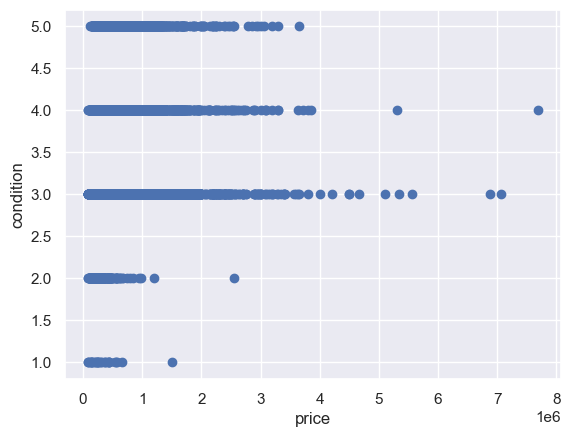

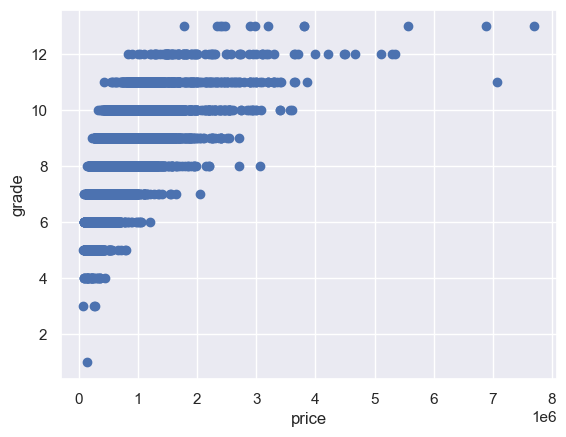

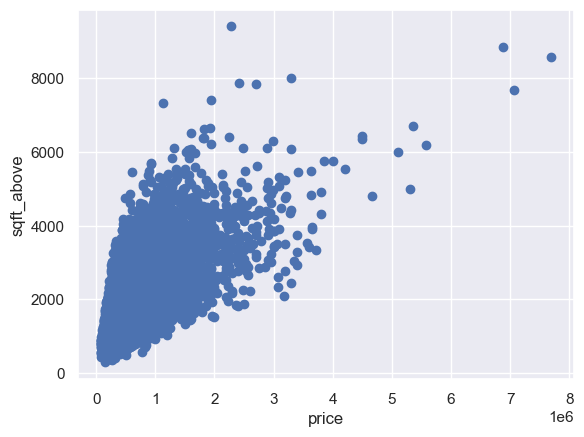

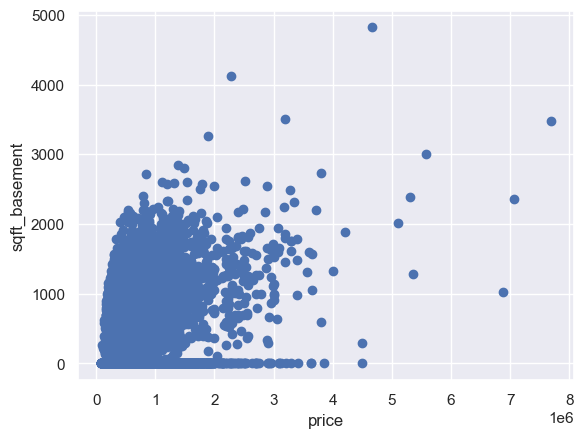

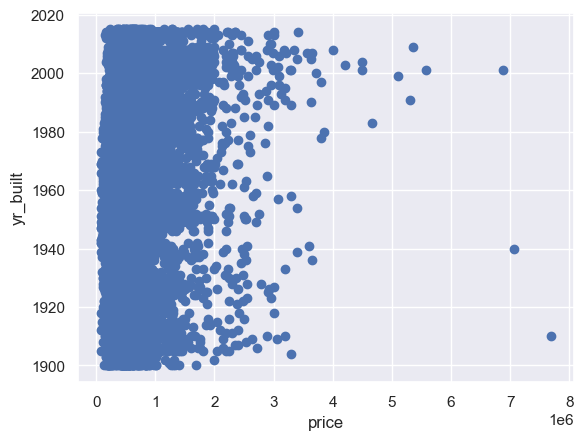

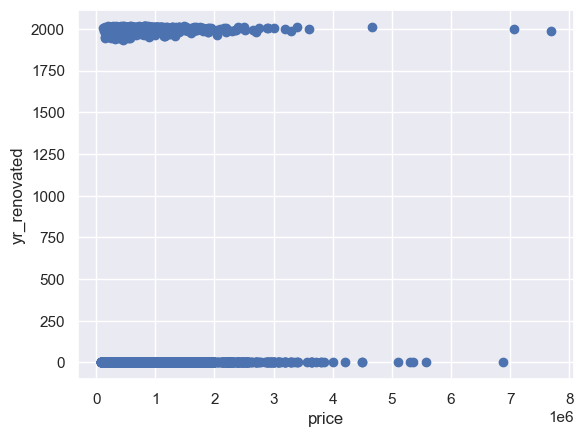

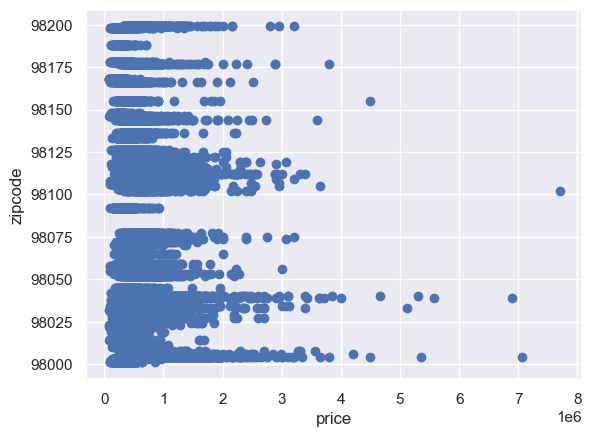

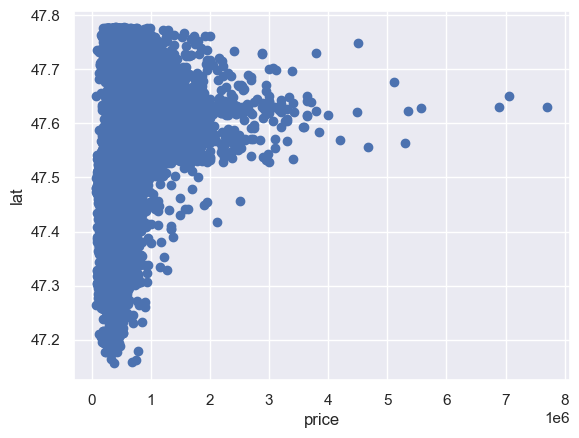

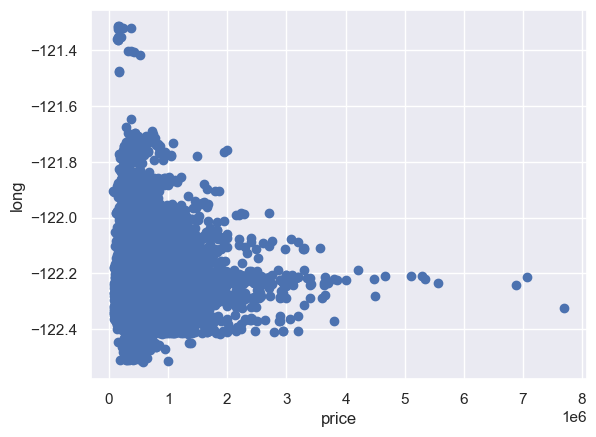

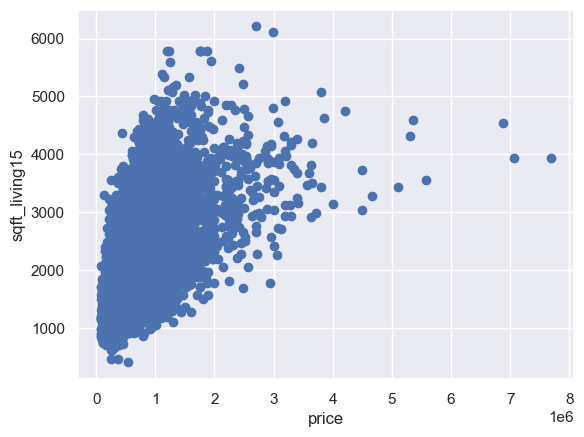

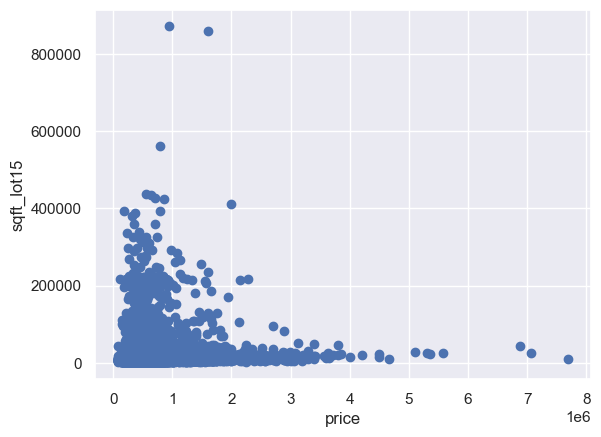

In [5]:
# Some analysis 
for z in df.columns:
    plt.scatter(df['price'], df[z])
    plt.xlabel('price')
    plt.ylabel(z)
    plt.show()

In [6]:
sns.pairplot(df)
plt.savefig('junk.png')

In [7]:
# More analysis through cov matrix 
from sklearn.preprocessing import LabelEncoder, RobustScaler

label_encoder = LabelEncoder()
scaler = RobustScaler()

df = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
normalizedData = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

conv_matrix = normalizedData.corr().round(3)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(conv_matrix, cmap="YlGnBu", linewidths=.75, annot=True, annot_kws={"size": 6}) 

# Model 1 (Usage with only LinearRegression)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

data = df
data = data.drop(['Unnamed: 0', 'id', 'date'], axis=1) # Manually dropping some things

filtered_data = data[~np.ma.fix_invalid(data).mask.any(axis=1)]

X = filtered_data.drop(['price'], axis = 1).values
Y = filtered_data['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5, shuffle = True)
print("There is NaN" if np.isnan(X).any() else "Clean of NaN")

Xscaled = StandardScaler().fit_transform(X_train)
lr = LinearRegression()
lr.fit(Xscaled, Y_train)
print(lr.coef_, lr.intercept_)

Clean of NaN
[-32492.64241343  33211.6858618   82135.87545334   3952.98751545
   2772.64910358  44138.45010001  39937.80480117  17404.58494338
 111239.48053446  77393.13695283  24896.99001656 -78844.5166293
   7550.0039037  -32107.18378441  84498.58237556 -30679.59690879
  14776.63547562  -8259.91375272] 539253.1917639113


# Analysis of score, R2 = 0.726

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_test_scaled = StandardScaler().fit_transform(X_test)
Ytest_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Ytest_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(Y_test, Ytest_pred, 
                        squared= True)
print('Mean squared error: ', mse)

r2 = r2_score(Y_test, Ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  123937.17270166075
Mean squared error:  37749538561.58513
R2 score is:  0.7259695853154546


# Prediction VS Real
Ideally want it to look like the identity function and definetely seems not too bad.

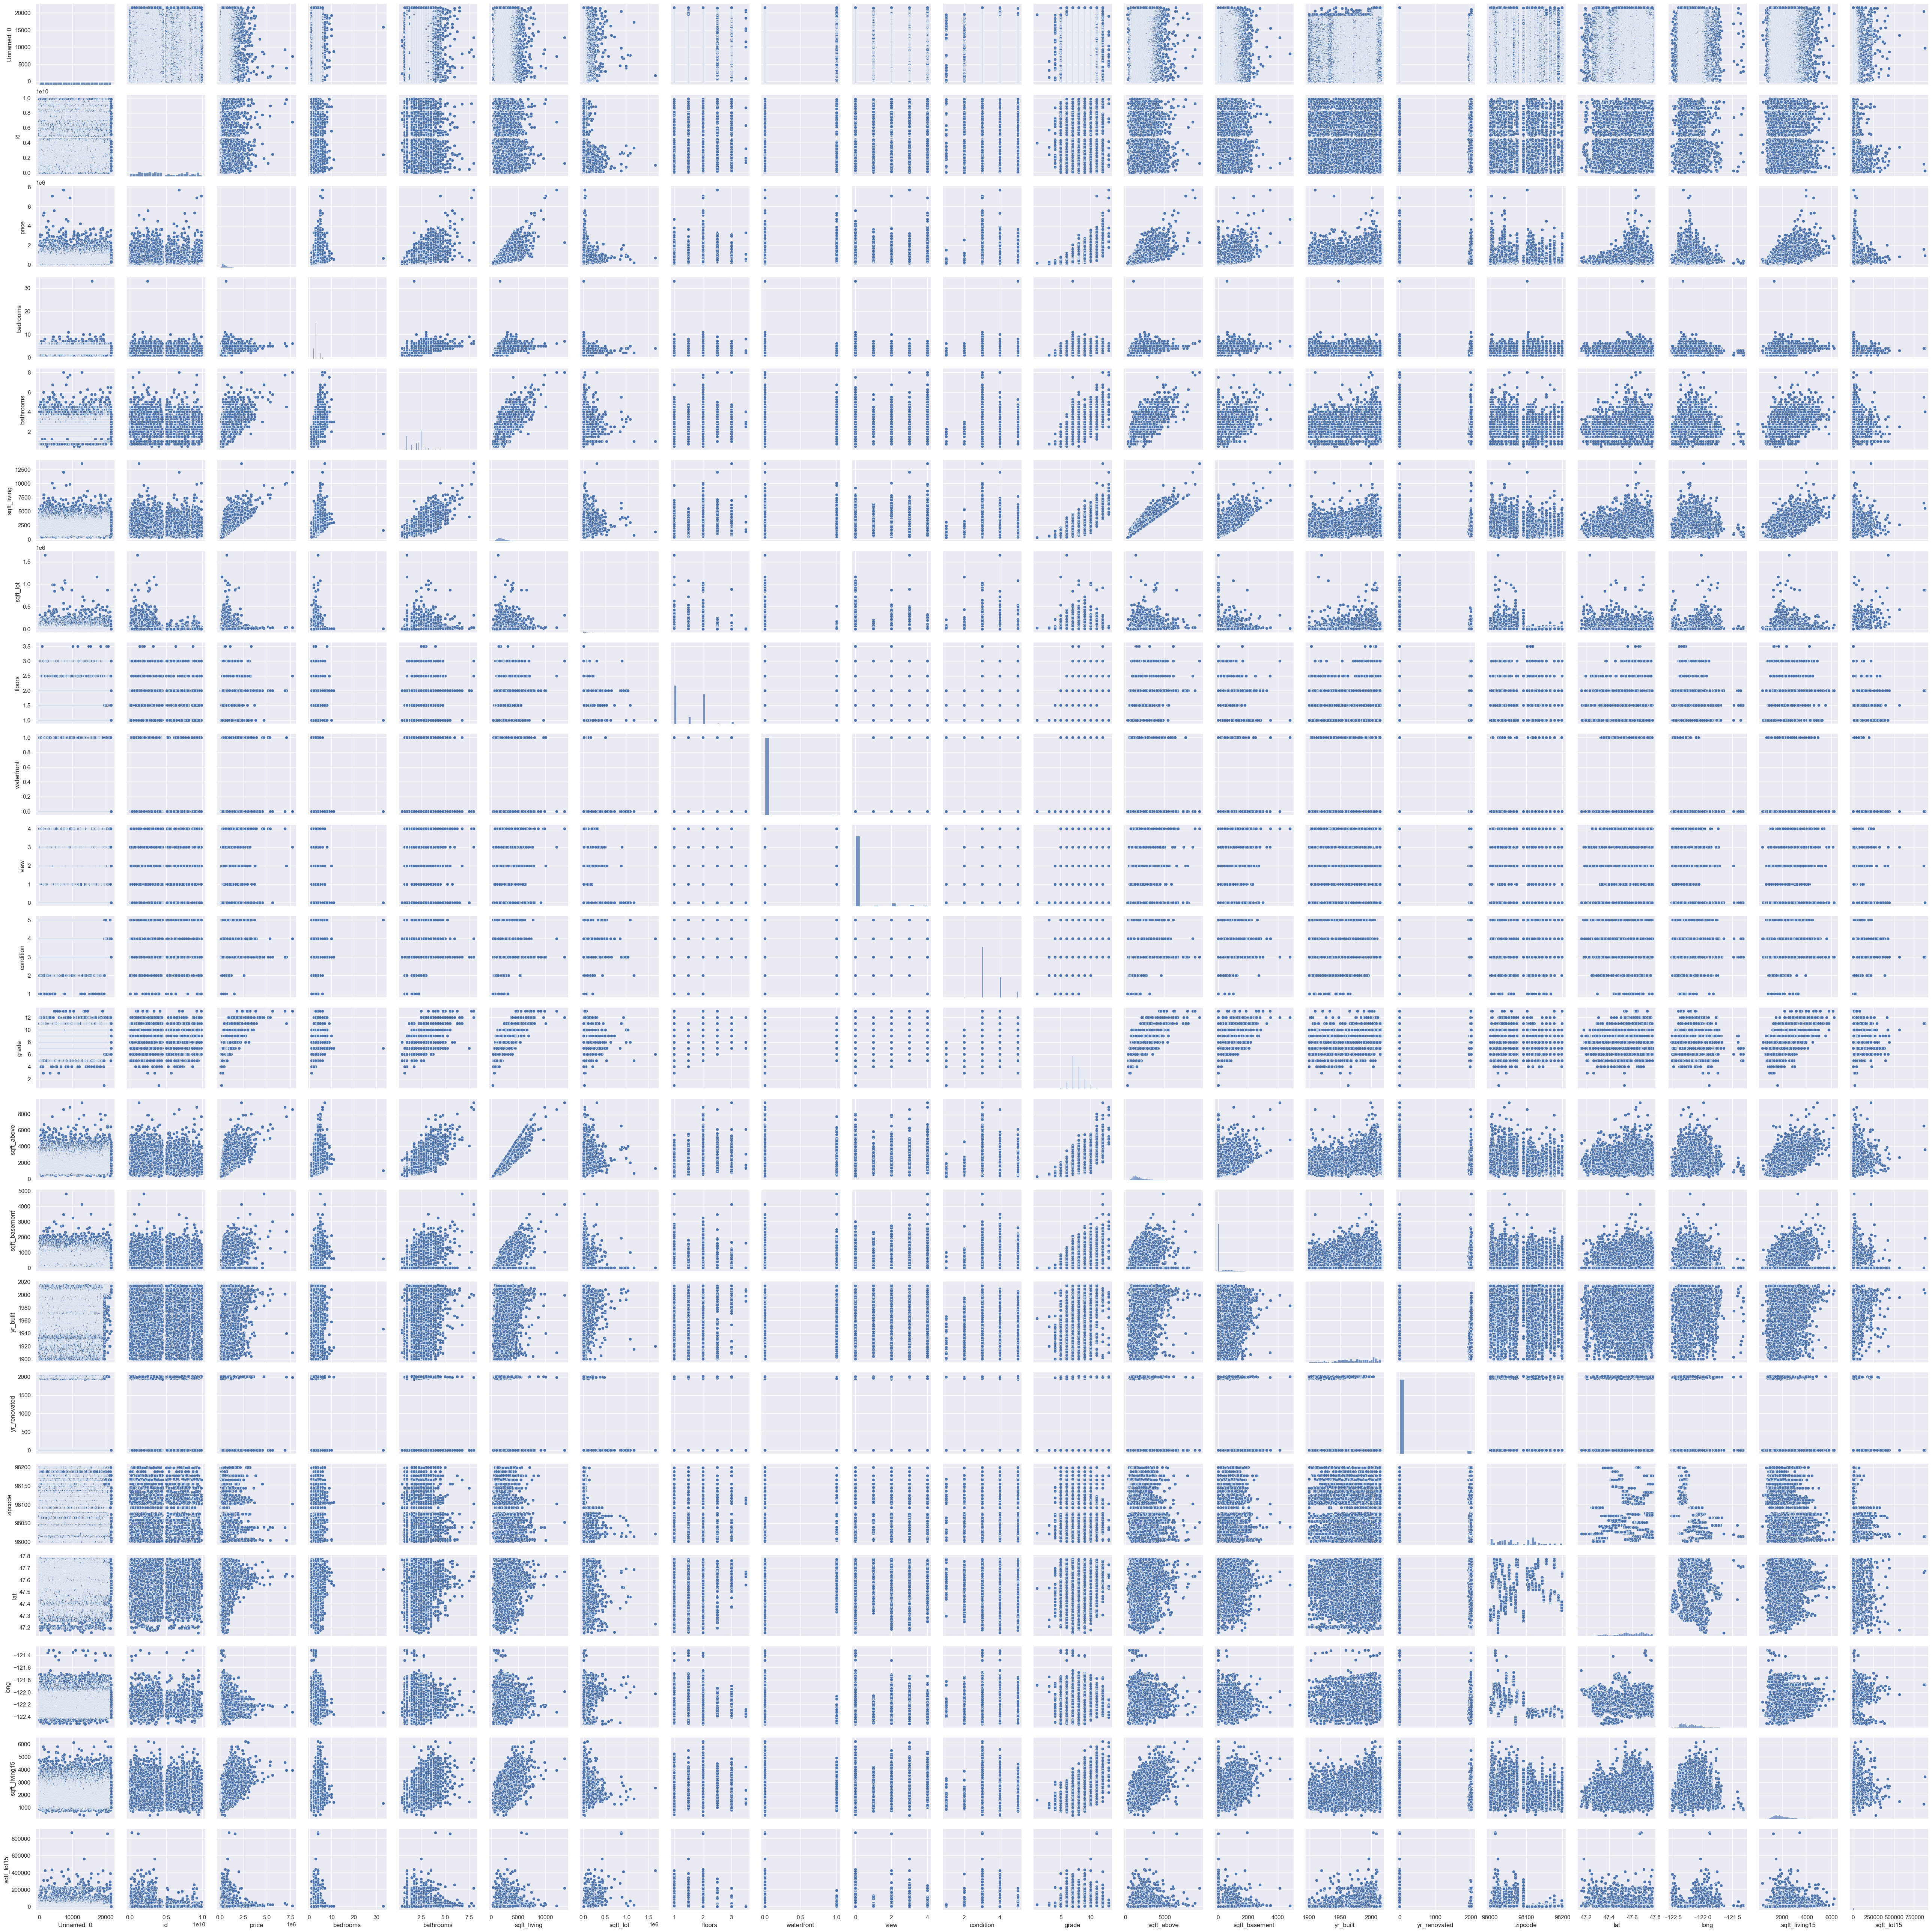

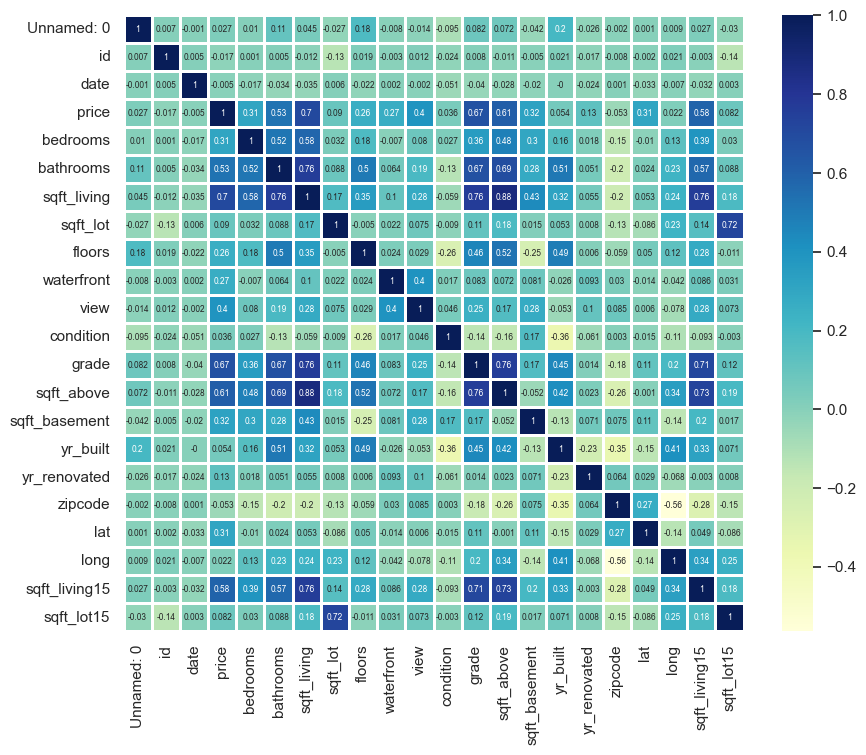

In [10]:
plt.scatter(Ytest_pred, Y_test, label = "TESTING DATA")
plt.show()

# Model 2 (Ridge regression (Still linear_model) with LinearTree)

In [11]:
# REDATA
data = df
data = data.drop(['Unnamed: 0', 'id', 'date'], axis=1)

filtered_data = data[~np.ma.fix_invalid(data).mask.any(axis=1)]

X = filtered_data.drop(['price'], axis = 1).values
Y = filtered_data['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1, shuffle = True)
print("There is NaN" if np.isnan(X).any() else "Clean of NaN")

Clean of NaN


In [12]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', category=ConvergenceWarning)
# Too many convergence warnings D:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from lineartree import LinearTreeRegressor

X_scaled = StandardScaler().fit_transform((X_train))

regr = LinearTreeRegressor(base_estimator=Ridge())
regr.fit(X_scaled, Y_train)

ModuleNotFoundError: No module named 'lineartree'

# Analysis of score, R2 = 0.874

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_test_scaled = StandardScaler().fit_transform(X_test)
Ytest_pred = regr.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, Ytest_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(Y_test, Ytest_pred, 
                        squared= True)
print('Mean squared error: ', mse)

r2 = r2_score(Y_test, Ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  78809.78977864583
Mean squared error:  15784209303.834808
R2 score is:  0.8742405096630048


# Prediction VS Real
Ideally want it to look like the identity function and definetely seems decently close.

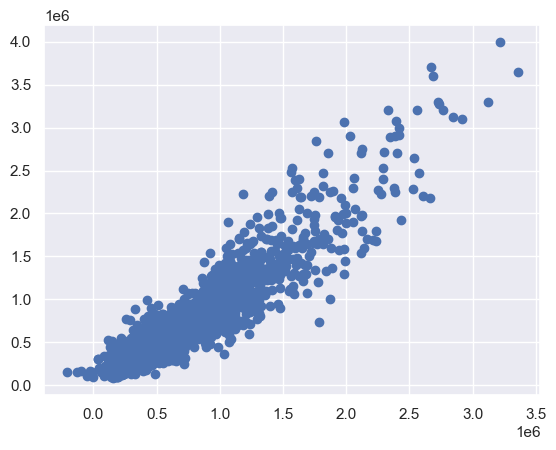

In [ ]:
plt.scatter(Ytest_pred, Y_test, label = "TESTING DATA")
plt.show()